<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/Inteligencia_guia6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Guia 6 Práctica Inteligencia Computacional 2023

#Ejercicio 1:
Implemente las estructuras de datos y algoritmos basicos para la solucion de un problema mediante algoritmos geneticos. Pruebe estas rutinas y compare los resultados con un metodo de gradiente descendiente para buscar el mınimo global de las siguientes funciones:

i) f(x) = −x*sin(sqrt(|x|)) con x ∈ [−512 . . . 512]

ii) f(x, y) = (x^2 + y^2)^(0.25)[sin(50*(x^2 + y^2)^(0.1) + 1)], con x, y ∈ [−100 . . . 100]



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f1(x):
  return (-1)*x*np.sin(np.sqrt(np.abs(x)))

In [ ]:
def f2(v):
  x=v[0]; y=v[1]
  return ((x**2 + y**2)**(0.25))*( np.sin(50*((x**2 + y**2)**(0.1)))**2 + 1)

In [ ]:
def decode(individuo):
  num = 0;  individuo_aux = individuo[::-1];  tamaño_individuo = len(individuo)
  for i in np.arange(0,tamaño_individuo):
    num = num + individuo_aux[i]*(np.power(2,(i),dtype='float32'))
    # print('i ',i,' individuo[i] ',individuo_aux[i])
    # print('suma ',num)
  return (num/(2**tamaño_individuo-1))*1024 -512

In [ ]:
def gradient_descent(learning_rate, num_iterations, initial_x):
    x = initial_x
    for i in range(num_iterations):

        x -= learning_rate * (-1)*np.sin(np.sqrt(np.abs(x))) + (-1)*(x)**2 * np.cos(np.sqrt(np.abs(x))) /(2 *np.abs(x)*np.sqrt(np.abs(x)))
    return x
print(gradient_descent(0.5,100,170))

201.85125830030114


In [33]:
def seleccion_competencia(k_seleccionados,tamaño_poblacion,fitness):
  # tomamos al azar k individuos no repetidos y devolvemos el índice del individuo que tenga mejor fitness
  seleccionados = np.full(k_seleccionados,-1)
  for i in np.arange(0,k_seleccionados):
    seleccionado = np.random.randint(low=0,high=tamaño_poblacion)
    while (np.isin(seleccionado, seleccionados)): # verificamos que el seleccionado no sea repetido
      seleccionado = np.random.randint(low=0,high=tamaño_poblacion)
    seleccionados[i] = seleccionado

  #   print('iteracion i = ',i,' seleccionados',seleccionados)
  # print('fitness seleccionados: ',fitness[seleccionados])
  # print('minimo fitness: ', np.argmin(fitness[seleccionados]))
  # print('minimo ',seleccionados[np.argmin(fitness[seleccionados])])
  return seleccionados[np.argmin(fitness[seleccionados])]

In [ ]:
def generar_individuo(tamaño_individuo):
  # genera un vector cuyos valores son 0 y 1 al azar
  individuo = np.full(tamaño_individuo,None)
  for i in np.arange(0,tamaño_individuo):
    individuo[i] = np.random.randint(low=0, high=2)
  return individuo

In [34]:
def mutacion_individuo(individuo):
  # tomamos una posición al azar y cambiamos está por 1 o 0 respectivamente
  posicion_mutar = np.random.randint(low=0, high=len(individuo))
  if individuo[posicion_mutar] == 0:
    individuo[posicion_mutar] = 1
  else:
    individuo[posicion_mutar] = 0
  return individuo

In [35]:
def cruza_individuos(individuo1,individuo2):
  # tomamos 2 individuos y generamos un numero al azar dónde se cambiarán dichos valores
  # de los individuos por los del otro
  ind_mutar = np.random.randint(low=0, high=len(individuo1))
  aux = individuo1[ind_mutar:]
  individuo1[ind_mutar:] = individuo2[ind_mutar:]
  individuo2[ind_mutar:] = aux
  return individuo1,individuo2

In [ ]:
# ALGORITMO GENETICO:

# i) f(x) = −x*sin(sqrt(|x|)) con x ∈ [−512 . . . 512]

# iniciar la poblacion con su fitness con 10 bits represento el x, ya que x ∈ [−512 . . . 512]
tamaño_individuo = 10
tamaño_poblacion = 10
iteraciones_max = 2000
k_progenitores = 10     # cantidad de progenitores a elegir
paciencia_max = 50

poblacion = np.full(tamaño_poblacion,None)
fitness = np.full(tamaño_poblacion,None)
for i in np.arange(0,tamaño_poblacion):
  poblacion[i] = generar_individuo(tamaño_individuo) # generamos la poblacion de individuos
  fitness[i] = f1(decode(poblacion[i]))   # obtenemos el mejor fitness evaluando toda la poblacion -> f1 funcion de fitness

individuo_mejorFitness = poblacion[np.argmin(fitness)]
individuo_mejorFitness_aux = individuo_mejorFitness.copy()
progenitores = np.full(k_progenitores,None)
iteracion = 0
paciencia = 0
# mientras
while iteracion < iteraciones_max and paciencia <= paciencia_max:
  # seleccionamos los progenitores -> seleccion por competencia k = 5, numero de progenitores = 10
  for i in np.arange(0,k_progenitores):
    progenitores[i] = seleccion_competencia(5,tamaño_poblacion,fitness)

  # cruza/mutacion de la proxima generacion
  for i in np.arange(0,k_progenitores,2):
    if np.random.rand() <= 0.9: # probabilidad_cruza <= 0.9
      individuo1,individuo2 = cruza_individuos(poblacion[progenitores[i]],poblacion[progenitores[i+1]])
      poblacion[progenitores[i]] = individuo1
      poblacion[progenitores[i+1]] = individuo2
    if np.random.rand() <= 0.1: # probabilidad_mutacion <= 0.1
      individuo1 = mutacion_individuo(poblacion[progenitores[i]])
      individuo2 = mutacion_individuo(poblacion[progenitores[i+1]])
      poblacion[progenitores[i]] = individuo1
      poblacion[progenitores[i+1]] = individuo2
  # obtenemos el mejor fitness evaluando la nueva poblacion
  poblacion[0]=individuo_mejorFitness.copy()
  for i in np.arange(0,tamaño_poblacion):
    fitness[i] = f1(decode(poblacion[i]))
  individuo_mejorFitness_aux = poblacion[np.argmin(fitness)]
  if f1(decode(individuo_mejorFitness_aux)) < f1(decode(individuo_mejorFitness)):
    print("menor",f1(decode(individuo_mejorFitness_aux)))
    print("mejor",f1(decode(individuo_mejorFitness)))
    individuo_mejorFitness = individuo_mejorFitness_aux.copy()
    paciencia = 0
  else:
    paciencia+=1
  #print(decode(individuo_mejorFitness))
  #print(f1(decode(individuo_mejorFitness)))
  iteracion+=1
# endwhile

menor -201.38913953698702
mejor -199.91354288558327
menor -201.74320073754365
mejor -201.38913953698702
menor -211.65449591731615
mejor -201.74320073754365
menor -297.0167474330747
mejor -211.65449591731615
menor -322.9798792831644
mejor -297.0167474330747
menor -369.5450038843278
mejor -322.9798792831644
menor -374.243567923486
mejor -369.5450038843278
menor -382.9788569028218
mejor -374.243567923486
menor -408.68962055976823
mejor -382.9788569028218
menor -415.759306309087
mejor -408.68962055976823


Cantidad de iteraciones:  182
Individuo con mejor fitness:  415.90615835777123
Mejor fitness encontrado:  -415.759306309087
201.8512583002921


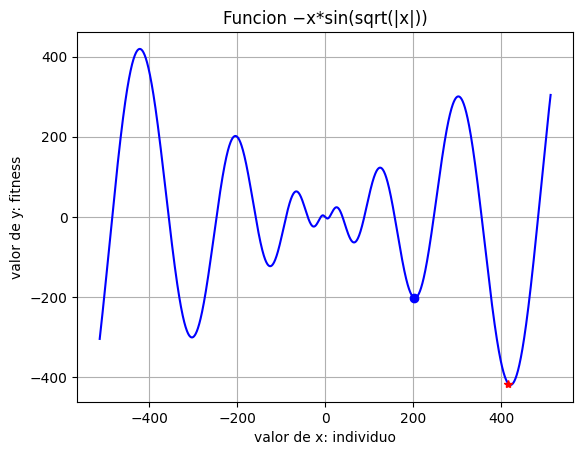

In [ ]:
print('Cantidad de iteraciones: ',iteracion)
print('Individuo con mejor fitness: ',decode(individuo_mejorFitness))
print('Mejor fitness encontrado: ',f1(decode(individuo_mejorFitness)))
x = np.linspace(-512, 512,num=2048)
y = f1(x)
plt.plot(x,y,'b-')
x_o = np.random.rand() * 200
x = gradient_descent(0.5,100,x_o)
print(x)
plt.plot(x,f1(x),'bo')
plt.plot(decode(individuo_mejorFitness),f1(decode(individuo_mejorFitness)),'*r')
plt.title('Funcion −x*sin(sqrt(|x|))')
plt.xlabel('valor de x: individuo')
plt.ylabel('valor de y: fitness')
plt.grid()
plt.show()

In [ ]:
def decode2(individuo):
  num = np.array([0,0]);  individuo_aux = individuo[::-1];  tamaño_individuo = len(individuo); mitad = int(tamaño_individuo/2)
  for i in np.arange(0,mitad):
    num[0] = num[0] + individuo_aux[i]*(np.power(2,(i),dtype='float32'))
  for i in np.arange(mitad,tamaño_individuo):
    num[1] = num[1] + individuo_aux[i]*(np.power(2,(i-mitad),dtype='float32'))
  return (num/(2**mitad-1))*200-np.array([100,100])
  # return num[0]-100,num[1]-100

In [ ]:
print(decode2(np.array([1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1])))

[-50.58823529  94.50980392]


In [ ]:
def gradient_descent_2d(learning_rate, num_iterations, initial_x, initial_y):
    x = initial_x
    y = initial_y
    for i in range(num_iterations):
        gradient_x = 0.5*x * (np.sin(50*(x**2+y**2)**0.1)**2) / (x**2+y**2)**0.75  + 20*x*np.cos(50*(x**2+y**2)**0.1) * np.sin(50*(x**2+y**2)**0.1)/(x**2+y**2)**0.65
        gradient_y = 0.5*y * (np.sin(50*(x**2+y**2)**0.1)**2) / (x**2+y**2)**0.75  + 20*y*np.cos(50*(x**2+y**2)**0.1) * np.sin(50*(x**2+y**2)**0.1)/(x**2+y**2)**0.65
        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y
    return x, y

In [ ]:
 # ii) f(x, y) = (x^2 + y^2)^(0.25)[sin(50*(x^2 + y^2)^(0.1) + 1)], con x, y ∈ [−100 . . . 100]

# con 8 bits represento el x, ya que x ∈ [−100 . . . 100]
# y con 16 represento los valores para x y para y,
tamaño_individuo_b = 16
tamaño_poblacion_b = 20
iteraciones_max_b = 2000
k_progenitores_b = 20
paciencia_max_b = 1000

# inicializamos la problacion
poblacion_b = np.full(tamaño_poblacion_b,None)
fitness_b = np.full(tamaño_poblacion_b,None)
for i in np.arange(0,tamaño_poblacion_b):
  poblacion_b[i] = generar_individuo(tamaño_individuo_b)
  fitness_b[i] = f2(decode2(poblacion_b[i]))   # f2 funcion de fitness
# obtengo el individuo con mejor fitness
individuo_mejorFitness_b = poblacion_b[np.argmin(fitness_b)].copy()

progenitores_b = np.full(k_progenitores_b,None)
iteracion_b = 0
fitnesRequerido = 0.01
paciencia=0
# bucle
while iteracion_b < iteraciones_max_b and paciencia < paciencia_max_b:
  # tomo a los progenitores
  for i in np.arange(0,k_progenitores_b):
    progenitores_b[i] = seleccion_competencia(5,tamaño_poblacion_b,fitness_b)
  # cruza/mutacion de los progenitores
  for i in np.arange(0,k_progenitores_b,2):
   if np.random.rand() <= 0.9: # probabilidad_cruza <= 0.9
      individuo1,individuo2 = cruza_individuos(poblacion_b[progenitores_b[i]],poblacion_b[progenitores_b[i+1]])
      poblacion_b[progenitores_b[i]] = individuo1
      poblacion_b[progenitores_b[i+1]] = individuo2
   if np.random.rand() <= 0.1: # probabilidad_mutacion <= 0.1
      individuo1 = mutacion_individuo(poblacion_b[progenitores_b[i]])
      individuo2 = mutacion_individuo(poblacion_b[progenitores_b[i+1]])
      poblacion_b[progenitores_b[i]] = individuo1
      poblacion_b[progenitores_b[i+1]] = individuo2
  # obtenemos el mejor fitness evaluando la nueva poblacion
  poblacion_b[0]=individuo_mejorFitness_b.copy()
  for i in np.arange(0,tamaño_poblacion_b):
    fitness_b[i] = f2(decode2(poblacion_b[i]))
  individuo_mejorFitness_aux_b = poblacion_b[np.argmin(fitness_b)].copy()
  if f2(decode2(individuo_mejorFitness_aux_b)) < f2(decode2(individuo_mejorFitness_b)):
    print("menor",f2(decode2(individuo_mejorFitness_aux_b)))
    print("mejor",f2(decode2(individuo_mejorFitness_b)))
    individuo_mejorFitness_b = individuo_mejorFitness_aux_b.copy()
    paciencia = 0
  else:
    paciencia+=1
  iteracion_b+=1
# endwhile


menor 6.250187932349943
mejor 6.7764460450090445
menor 4.960212669105308
mejor 6.250187932349943
menor 4.536810063457974
mejor 4.960212669105308
menor 4.479224608144083
mejor 4.536810063457974
menor 3.4479755733652575
mejor 4.479224608144083
menor 3.025205052135652
mejor 3.4479755733652575
menor 2.133764080373371
mejor 3.025205052135652
menor 2.0870234597759327
mejor 2.133764080373371
menor 0.8895783139209392
mejor 2.0870234597759327


In [ ]:
print('Cantidad de iteraciones: ',iteracion_b)
ind = decode2(individuo_mejorFitness_b)
print('Individuo con mejor fitness: ',ind)
print('Mejor fitness encontrado: ',f2(ind))
x = y = np.linspace(-100, 100,num=200)
x, y = np.meshgrid(x, y)
z = f2([x,y])
# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
surf = ax.plot_surface(x, y, z)
x,y = gradient_descent_2d(0.5,100,np.random.rand()*20,np.random.rand()*20)
print(x,y)
ax.scatter(ind[0], ind[1], f2(ind), color='red', s=50)
ax.scatter(x, y, f2([x,y]), color='green', s=50)
ax.set_title('Funcion (x^2 + y^2)^(0.25)[sin^2(50*(x^2 + y^2)^(0.1) + 1)]')
ax.set_xlabel('valor de x')
ax.set_ylabel('valor de y')
ax.set_zlabel('valor de fitness')
ax.view_init(elev=10, azim=60)
plt.show()

NameError: ignored


#Ejercicio 2:
Disene e implemente un algoritmo genetico que busque el mejor subconjunto de caracterısticas para la clasificacion de cancer leucemia linfocıtica aguda y leucemia mielogena aguda) a partir de datos genomicos. Se proveen 38 muestras en el conjunto de entrenamiento y 34 en el conjunto de prueba (leukemia train.csv y leukemia test.csv, respectivamente). Cada muestra se compone de un total de 7129 caracterısticas, que corresponden a valores de expresion genica

In [30]:
import numpy as np
datos_train_leukemia = np.genfromtxt("leukemia_train.csv", delimiter="," , skip_header=1)
datos_test_leukemia = np.genfromtxt("leukemia_test.csv", delimiter="," , skip_header=1)

# datos entrenamiento
x_train_data = datos_train_leukemia[:,:-1]
y_train_data = datos_train_leukemia[:,-1:]
# x_monitor_data = datos_train_leukemia[30:,:-1]
# y_monitor_data = datos_train_leukemia[30:,-1:]
tamaño_individuo2 = len(x_train_data[0])
print('tamaño del individuo: ',tamaño_individuo2)

# datos test
x_test_data = datos_test_leukemia[:,:-1]
y_test_data = datos_test_leukemia[:,-1:]

tamaño del individuo:  7129


In [21]:
# clasificador que vamos a usar es svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [22]:
def armar_vector_datos(individuo,cant_caracteristicas,datos):
  v = np.full(len(datos),None)
  rango = np.where(individuo == 1)[0]
  for i in np.arange(0,len(datos)):
    v[i] = datos[i][rango]
  return v.tolist()

In [7]:
def generar_individuo2(size_individuo,porcentaje):
  cant_unos = int(size_individuo*porcentaje)
  individuo = np.zeros(size_individuo)
  rango = np.random.randint(low=0,high=size_individuo,size=cant_unos)
  individuo[rango] = 1
  return individuo

In [23]:
# la funcion de decodificar hace:
# - cuenta la cantidad de caracteristicas del individuo (cuantos 1 tiene)
def decode3(individuo):
  return np.count_nonzero(individuo == 1)

In [31]:
def f3(a,b,carac_selec,total_carac,individuo,x_train,y_train,x_test,y_test):
  # fitness = a*accuracy - b*(carac_seleccionadas / total_caracteristicas)
  # - genera un vector con las caracteristicas en 1 del individuo y los datos de train
  # - entrena el clasificador con dicho vector
  # - evalua la tasa de aciertos con los datos de monitoreo
  # - devuelve la [la cantidad de caracteristicas de dicho individuo, tasa de aciertos del clasificador]
  datos_segun_carac = armar_vector_datos(individuo,carac_selec,x_train)
  datos_segun_carac_test = armar_vector_datos(individuo,carac_selec,x_test)
  clf = SVC(kernel='poly', tol=0.01)
  clf.fit(datos_segun_carac,y_train)
  accuracy = accuracy_score(y_test, clf.predict(datos_segun_carac_test))
  return a*accuracy - b*(carac_selec / total_carac)

In [ ]:
# iniciar la poblacion con su fitness
tamaño_poblacion2 = 38      # 38 datos de prueba
iteraciones_max2 = 2000
k_progenitores2 = 10        # cantidad de progenitores a elegir
a = 0.75
b = 100
total_caracteristicas = tamaño_individuo2
paciencia_max_2 = 1000


poblacion2 = np.full(tamaño_poblacion2,None)
fitness2 = np.full(tamaño_poblacion2,None)
for i in np.arange(0,tamaño_poblacion2):
  poblacion2[i] = generar_individuo2(tamaño_individuo2,0.1 + (i+1)/100)
  fitness2[i] = f3(a,b,decode3(poblacion2[i]),tamaño_individuo2,poblacion2[i],x_train_data,y_train_data,x_test_data,y_test_data)

# mantengo el indice del vector para poder hacer varias referencias
mejorFitness2 = np.argmax(fitness2)
individuo_mejorFitness = poblacion2[mejorFitness2].copy()

progenitores2 = np.full(k_progenitores2,None)
fitnessRequerido2 = 0.8
iteracion2 = 0
paciencia = 0
# mientras mejorFitness < fitnessRequerido
while iteracion2 < iteraciones_max2 and fitness2[mejorFitness2] <= fitnessRequerido2 and paciencia <= paciencia_max_2:
  progenitores2 = np.full(k_progenitores2,None)
  for i in np.arange(0,k_progenitores2):
    progenitores2[i] = seleccion_competencia(k_progenitores2,tamaño_poblacion2,fitness2)
  for i in np.arange(0,k_progenitores2,2):
    if np.random.rand() <= 0.9:
      ind1,ind2 = cruza_individuos(poblacion2[progenitores2[i]],poblacion2[progenitores2[i+1]])
      poblacion2[progenitores2[i]] = ind1
      poblacion2[progenitores2[i+1]] = ind2
    if np.random.rand() <= 0.3:
      ind1 = mutacion_individuo(poblacion2[progenitores2[i]])
      ind2 = mutacion_individuo(poblacion2[progenitores2[i+1]])
      poblacion2[progenitores2[i]] = ind1
      poblacion2[progenitores2[i+1]] = ind2
  poblacion2[0]=individuo_mejorFitness.copy()
  for i in np.arange(0,tamaño_poblacion2):
    fitness2[i] = f3(a,b,decode3(poblacion2[i]),tamaño_individuo2,poblacion2[i],x_train_data,y_train_data,x_test_data,y_test_data)

  mejorFitness2_aux = np.argmax(fitness2)
  individuo_mejorFitness_aux = poblacion2[mejorFitness2].copy()

  if mejorFitness2_aux < mejorFitness2:
    individuo_mejorFitness = individuo_mejorFitness_aux.copy()
    mejorFitness2 = mejorFitness2_aux
    paciencia = 0
  else:
    paciencia+=1

  iteracion2+=1
# endwhile

In [38]:
clf = SVC(kernel='poly', tol=0.01)
clf.fit(x_train_data,y_train_data)
accuracy_todos = accuracy_score(y_test_data, clf.predict(x_test_data))
print('accuracy con todos los datos: ',accuracy_todos)

accuracy con todos los datos:  0.7272727272727273


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
print('cantidad de iteraciones: ',iteracion2)
print('mejor fitness encontrado ',fitness2[mejorFitness2])
print('individuo con mejor fitness encontrado ',poblacion2[mejorFitness2])
print('cantidad de caracteristicas: ',decode3(poblacion2[mejorFitness2]))
datos_train = armar_vector_datos(poblacion2[mejorFitness2],decode3(poblacion2[mejorFitness2]),x_train_data)
datos_test = armar_vector_datos(poblacion2[mejorFitness2],decode3(poblacion2[mejorFitness2]),x_test_data)
clf_mejor = SVC(kernel='poly', tol=0.01)
clf_mejor.fit(datos_train,y_train_data)
accuracy = accuracy_score(y_test_data, clf_mejor.predict(datos_test))
print('accuracy del mejor individuo: ',accuracy)

cantidad de iteraciones:  1001
mejor fitness encontrado  -9.927546257922186
individuo con mejor fitness encontrado  [0. 0. 0. ... 0. 0. 0.]
cantidad de caracteristicas:  745
accuracy del mejor individuo:  0.696969696969697


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
